# **Analyzing Crime Data in Los Angeles**

![Los Angeles skyline](la_skyline.jpg)

**Los Angeles, California 😎**

Welcome to the City of Angels, known for its vibrant culture, sunny weather, and iconic entertainment industry. Despite its allure, Los Angeles faces significant crime challenges. We aim to support the LAPD by analyzing crime data to identify patterns and optimize resource allocation.

## Objective
Our objective is to analyze crime data and provide actionable insights for enhancing public safety strategies across different areas of Los Angeles.

## Dataset Overview

### Dataset: `crimes.csv`

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

---

# **Import Libraries and Read Data**

In [81]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


---

# **Analyze Peak Crime Hours**

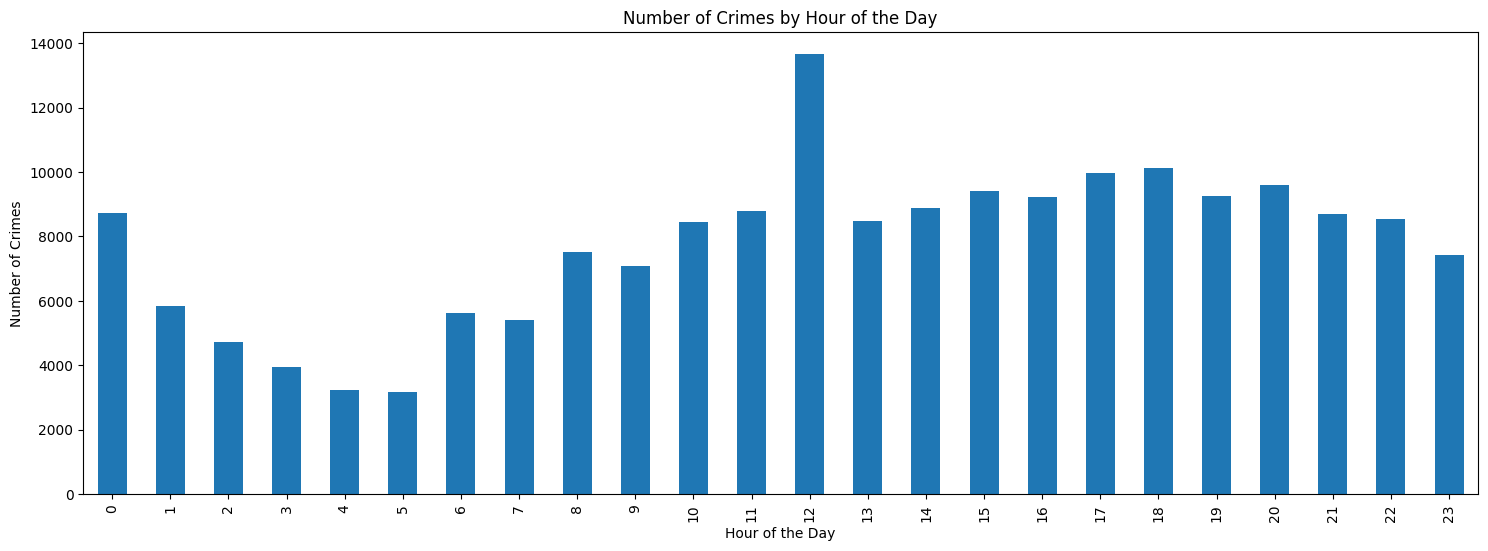

In [78]:
# Which hour has the highest frequency of crimes
crimes_hour = crimes['TIME OCC'].astype('string').str.slice(0, 2).astype('int')
peak_crime_hour = crimes_hour.value_counts().index[0]

# Plotting number of crimes by hour
plt.figure(figsize=(18, 6))
crimes_hour.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Hour of the Day')
plt.show()

---

# **Analyze Night Crimes by Area**

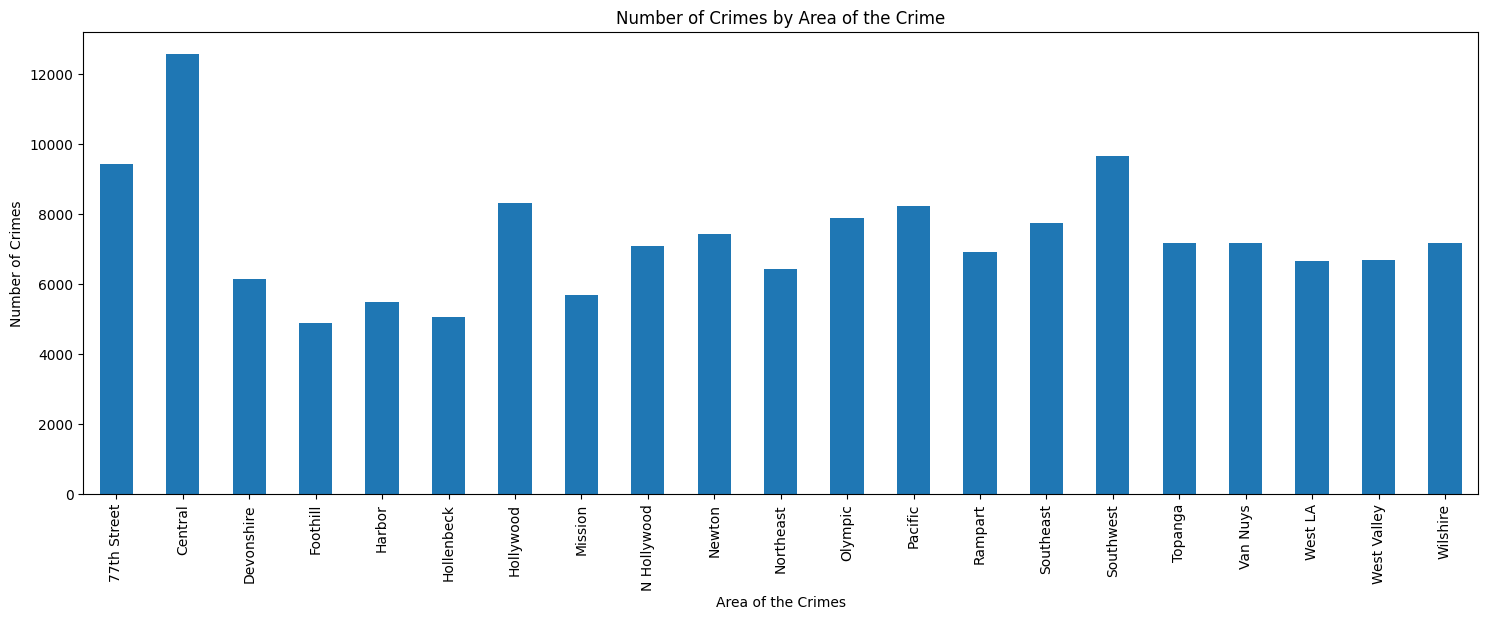

In [79]:
# Which area has the largest frequency of night crimes (10 PM to 4 AM)
crimes['TIME OCC'] = crimes['TIME OCC'].astype('int')
night_crimes = crimes[((crimes['TIME OCC'] >= 1000) & (crimes['TIME OCC'] <= 2359)) | 
                      ((crimes['TIME OCC'] >= 0) & (crimes['TIME OCC'] < 400))]
peak_night_crime_location = night_crimes['AREA NAME'].value_counts().index[0]

# Plotting number of crimes by area during night hours
plt.figure(figsize=(18, 6))
night_crimes['AREA NAME'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Area of the Crimes')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by Area of the Crime')
plt.show()

---

# **Analyze Victim Age Categories**

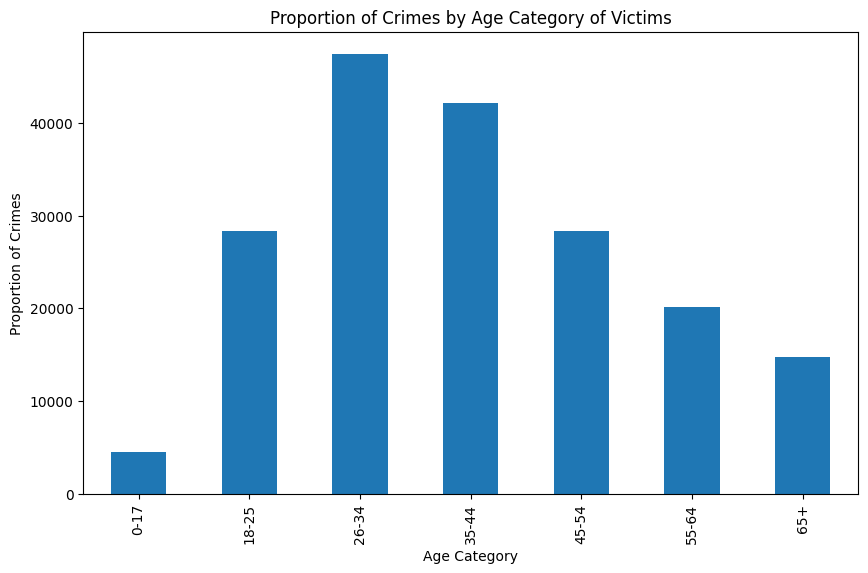

In [80]:
# Identifying the number of crimes committed against victims of different age groups
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]

crimes['Vict Age Cat'] = pd.cut(crimes['Vict Age'], labels=labels, bins=bins)
victim_ages = crimes['Vict Age Cat'].value_counts()

# Plotting proportion of crimes by age category of victims
plt.figure(figsize=(10, 6))
victim_ages.sort_index().plot(kind='bar')
plt.xlabel('Age Category')
plt.ylabel('Proportion of Crimes')
plt.title('Proportion of Crimes by Age Category of Victims')
plt.show()

---

# **Conclusion and Recommendations**

Our analysis reveals critical insights into crime patterns in Los Angeles, enabling the LAPD to:

- **Optimize Patrol Strategies:** Allocate resources effectively based on peak crime hours and high-risk areas.
- **Targeted Community Outreach:** Tailor outreach programs to address vulnerable demographic groups.
- **Enhance Data-Driven Policing:** Implement strategies informed by detailed crime analysis to improve public safety.

---

### Next Steps

- **Implementation:** Begin integrating these insights into operational strategies for immediate impact.
- **Continuous Monitoring:** Regularly update analyses to adapt to evolving crime trends and enhance effectiveness.

---

By leveraging data analytics, we aim to contribute to a safer and more secure Los Angeles for all residents and visitors.